In [41]:
# Data Analysis
import pandas as pd
import numpy as np

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
# Loading the data
df = pd.read_csv('Mall_Customers.csv')
print(f'Shape of the data: {df.shape}')
df.head()

Shape of the data: (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
# Duplicates check
df.duplicated().sum()

0

In [44]:
import pandas_profiling

In [45]:

data_profile = pandas_profiling.ProfileReport(df)

data_profile.to_file("dataprofile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [46]:
# Numerical variable description
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [47]:
# Missing values check
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

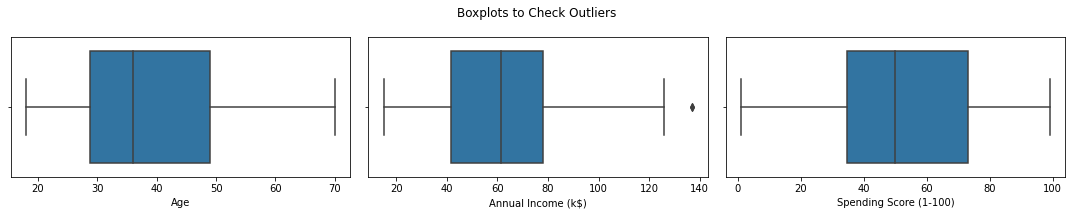

In [48]:
# Outliers check
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(df[cols[i]], ax=axs[i])
fig.suptitle('Boxplots to Check Outliers')
plt.tight_layout()
plt.show()

# Data Visualization

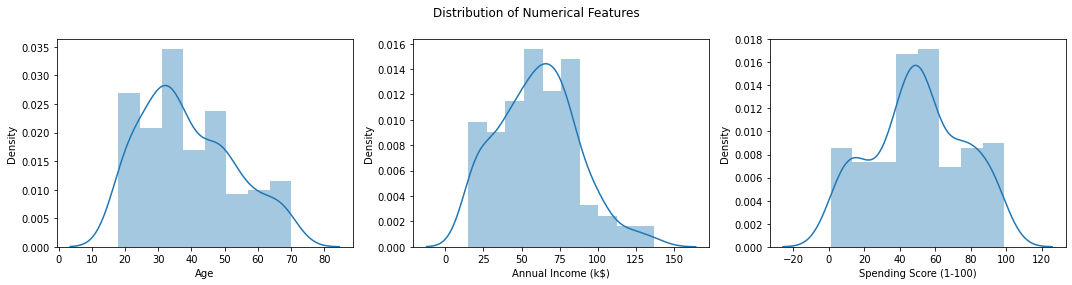

In [49]:
# Distribution of numerical features
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.distplot(df[cols[i]], ax=axs[i])
fig.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

In [50]:
df = df.drop("CustomerID", axis = 1)

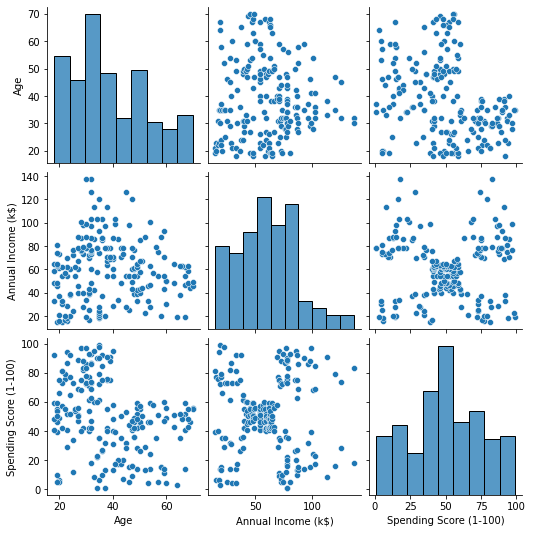

In [51]:
sns.pairplot(df)

In [52]:
# Label Encoding
df_encoded = df.replace({'Gender': {'Female':0, 'Male':1}})

In [53]:
df_encoded

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [54]:
# Feature Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(df_encoded)

In [55]:
X

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

# Modeling
We will use K-Means Clustering and Hierarchical Clustering algorithms.

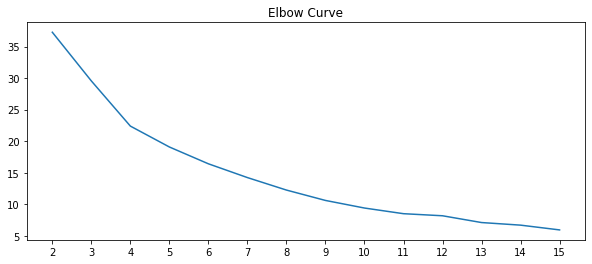

In [56]:


# K-Means Clustering
# Elbow Method to identify optimum no. of clusters
inertia = []
range_of_clusters = list(range(2, 16))
for k in range_of_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting Elbow Curve
plt.figure(figsize=(10, 4))
plt.plot(range_of_clusters, inertia)
plt.xticks(range_of_clusters)
plt.title('Elbow Curve')
plt.show()

# Considering the above elbow curve, 4 number of clusters will be an optimum choice.

In [57]:
X.shape

(200, 4)

In [58]:
X1 = X[:,1:]

In [59]:
X1

array([[0.01923077, 0.        , 0.3877551 ],
       [0.05769231, 0.        , 0.81632653],
       [0.03846154, 0.00819672, 0.05102041],
       [0.09615385, 0.00819672, 0.7755102 ],
       [0.25      , 0.01639344, 0.39795918],
       [0.07692308, 0.01639344, 0.76530612],
       [0.32692308, 0.02459016, 0.05102041],
       [0.09615385, 0.02459016, 0.94897959],
       [0.88461538, 0.03278689, 0.02040816],
       [0.23076923, 0.03278689, 0.7244898 ],
       [0.94230769, 0.03278689, 0.13265306],
       [0.32692308, 0.03278689, 1.        ],
       [0.76923077, 0.04098361, 0.14285714],
       [0.11538462, 0.04098361, 0.7755102 ],
       [0.36538462, 0.04098361, 0.12244898],
       [0.07692308, 0.04098361, 0.79591837],
       [0.32692308, 0.04918033, 0.34693878],
       [0.03846154, 0.04918033, 0.66326531],
       [0.65384615, 0.06557377, 0.28571429],
       [0.32692308, 0.06557377, 0.98979592],
       [0.32692308, 0.07377049, 0.34693878],
       [0.13461538, 0.07377049, 0.73469388],
       [0.

In [60]:
# K-Means Clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X1)

# Labeling the data
df_kmeans = df.copy()
df_kmeans['Cluster'] = kmeans.labels_
df_kmeans.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3


In [61]:
df_kmeans

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,3
1,Male,21,15,81,3
2,Female,20,16,6,3
3,Female,23,16,77,3
4,Female,31,17,40,3
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,0
197,Male,32,126,74,1
198,Male,32,137,18,0


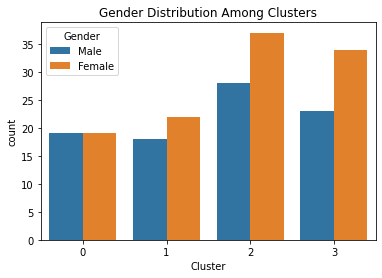

In [62]:
# Categorical variable distribution among clusters
sns.countplot(data=df_kmeans, x='Cluster', hue='Gender')
plt.title('Gender Distribution Among Clusters')
plt.show()

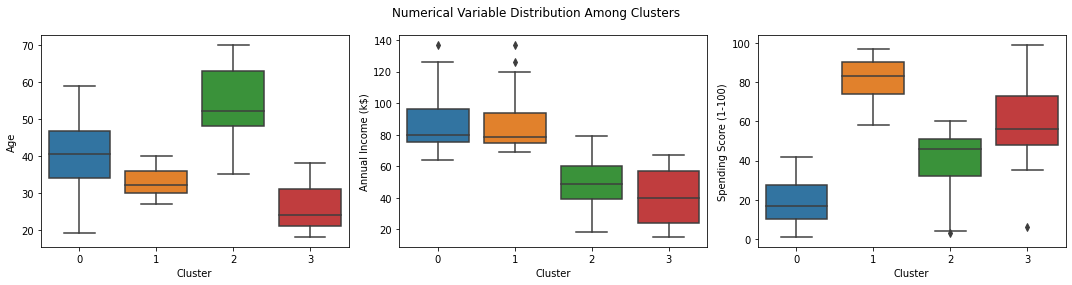

In [63]:
# Numerical variable distribution among clusters
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for i in range(len(cols)):
    sns.boxplot(data=df_kmeans, x='Cluster', y=cols[i], ax=axs[i])
fig.suptitle('Numerical Variable Distribution Among Clusters')
plt.tight_layout()
plt.show()

Cluster 0: High age females with low spending score

Cluster 1: High age males with low spending score

Cluster 2: Low age females with high spending score

Cluster 3: Low age males with high spending score

In [64]:
from sklearn.metrics import silhouette_score

In [65]:
print(silhouette_score(df_encoded, kmeans.labels_, metric='euclidean'))

0.3824087881658539


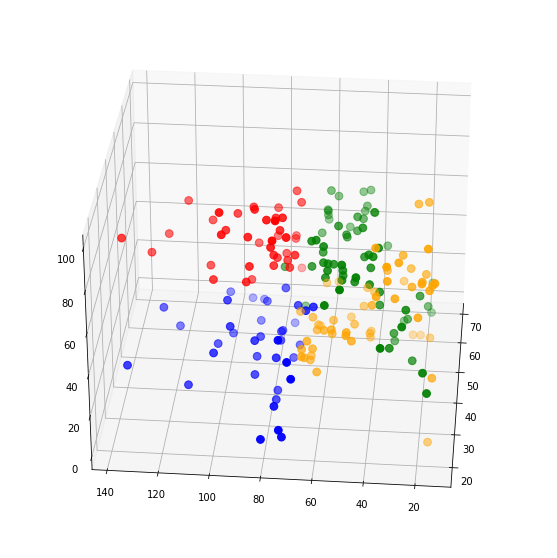

In [66]:

 
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_kmeans.Age[df_kmeans.Cluster == 0],df_kmeans["Annual Income (k$)"][df_kmeans.Cluster == 0], df["Spending Score (1-100)"][df_kmeans.Cluster == 0], c='blue', s=60)

ax.scatter(df_kmeans.Age[df_kmeans.Cluster == 1],df_kmeans["Annual Income (k$)"][df_kmeans.Cluster == 1],df_kmeans["Spending Score (1-100)"][df_kmeans.Cluster == 1], c='red', s=60)
ax.scatter(df_kmeans.Age[df_kmeans.Cluster == 2],df_kmeans["Annual Income (k$)"][df_kmeans.Cluster == 2], df_kmeans["Spending Score (1-100)"][df_kmeans.Cluster == 2], c='green', s=60)
ax.scatter(df_kmeans.Age[df_kmeans.Cluster == 3],df_kmeans["Annual Income (k$)"][df_kmeans.Cluster == 3],df_kmeans["Spending Score (1-100)"][df_kmeans.Cluster == 3], c='orange', s=60)

ax.view_init(30, 185)
plt.show()

In [70]:
q=kmeans.predict([[0.25, 0.01639344, 0.39795918]])

In [71]:
q

array([1])